**Kaggle**

# 타이타닉 대회로 캐글 대회 시작하기

* 작성자 진정우
* 수정일 : 2017.11.01

### 목차

1. 머신러닝 프로세스 소개 및 데이터 체크

2. 탐색적 데이터분석(EDA)

3. 피쳐 엔지니어링

4. 벤치마크 모델링

5. 피쳐 엔지니어링

7. 진짜 모델링 #1 (하이퍼 파리미터 최적화)

8. 진짜 모델링 #2 (앙상블 모델링)

9. 스테킹 모델링

10. 다시 탐색적 데이터분석 부터

<div align='center'>
<h2>들어가기 앞서</h2>
<br>
</div>

데이터분석에 대한 경험이 부족할 때 가장 혼란스러웠던 점은 "데이터를 로드하고 뭐해야되지? 탐색적 데이터분석이라고 했는데 무엇을 보는게 탐색적 데이터분석이지?" "어떤 경우에 어떤 전처리를 해야하지?" 같은 "명확함과 솔루션"이었고 이 답을 구하기위해 노력했습니다. 많은 입문자분들이 느끼시는 혼란도 저와 같았을 것이라고 생각합니다. 하지만 지금에서 왜 이런 질문을 했을까? 생각해본다면 데이터분석을 "데이터 속 정해진 답을 찾는것"이라 생각했기 때문이었습니다. 수학문제를 풀더라도, 이 경우에는 이렇게 풀어라. 시를 보더라도 이 단어는 이런 뜻을 지녔고 이런답을 선택해야한다. 이런 교육에 익숙해졌고, 데이터 분석에서도 명확한 답과 스킬?을 찾아 헤맸던것 같습니다. 이러한 사고방식이 결국 잘못된 길을 헤메게 한 것이 아니었나 싶습니다.

저는 데이터분석이 데이터라는 객관적 근거를 통해 "답을 만드는것"이라고 생각합니다. 예를 들어 타이타닉 데이터를 갖고 생존을 예측할 수 있지만, "생존을 결정했던 요소"라는 답을 만들 수도있고, 이를 근거로 "당시 서구 사회의 문화"라는 답을 만들 수도 있습니다. 중요한 것은 "이 데이터에서는 이런 일을 해야한다"라는 정형화된 솔루션이 아니라, "내가 찾고자 하는 결론을 얻기 위해서는 나는 무엇을 할 수 있는가?"였던것 같습니다. 

저는 취준생 나부생이일 뿐이고, 따라서 제가 틀렸을 수도 있습니다. 하지만 3년간 하루도 쉬지않고 분석을 해왔고 지금까지 느꼈던 점들을 두서없이 적어보았습니다. 제 생각을 잘 표현할 수 있는 상황을 끝으로 마무리하고싶습니다.

철수 : Hey Alex! 어떻게 하면 너처럼 영어를 잘할 수 있어?
Alex(미국인) : 음... 

저는 이러한 데이터분석의 특징을 '영어회화'에 비유하곤 합니다. 영어 회화를 공부할 때 Nice to meet you! ,Can you help me? 와 같이 상황에 따라 사용할 수 있는 문장을 공부하고 외국인과 회화를 시작하고 대화할 수 있습니다. 실제 많이 사용되는 문장이지만 이 문장들만 사용하는 사람을 영어를 잘한다 라고 표현하지 않습니다.


* 이러한 근본적인 원인은 "




<hr/>
<div align='center'>
<h1>1회차 분석 입니다.</h1>
<br>
<b>1회차의 목적 : 데이터를 빠르게 훓어보고 본격적 경연 전 "워밍업" 하는 것이 목적입니다.</b>
</div>
<hr/>



<b><h3>머신러닝 분석 프로세스 소개</h3></b>

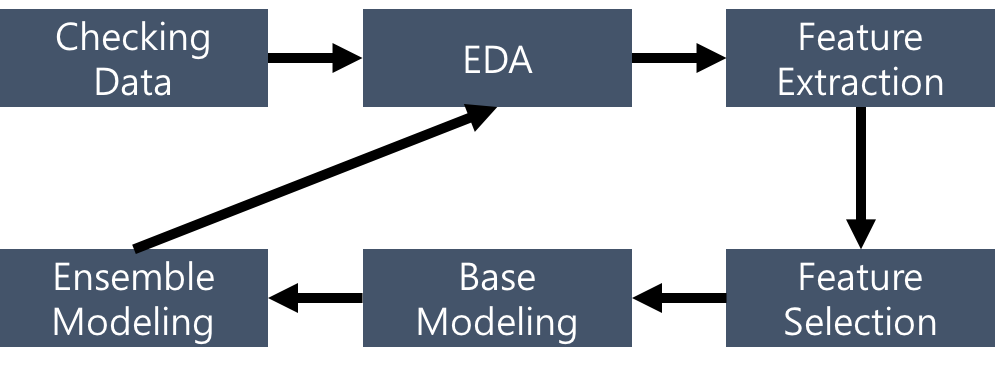

In [8]:
from IPython.display import Image
Image(filename='../img/1-1png.png', width=500, height=500) 

# 1. 데이터 체크

**<목적>**

데이터의 이상을 체크하고 데이터에 대해 이해하는 과정입니다.

**<구성>**
1. Check N
2. Check Head & Tail
3. Check Structures
4. Check Summary
5. Check NaN

### 데이터 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

path = os.listdir('../data/')
path

['test.csv', 'train.csv']

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

### (1) Check N : 데이터의 전체 사이즈를 체크하자

**<목적>**

1. 홈페이지에 주어진 데이터 크기와 비교하여 정확하게 로드됐는지 체크
2. Train 데이터의 사이즈를 파악하여 데이터전처리 속도와 모델링 속도 등을 파악하여 분석 방법에 대해 대략적으로 감잡는다.
    - 예) 데이터의 크기가 5천만개행 -> 샘플링, 청크방식으로 데이터를 로드, 처리, 분석 or 어레이연산이 필수
    - 절대적인 기준은 없고 분석가의 하드웨어 성능에 따라 다릅니다.

In [3]:
print('============= Checking N ====================')
print('Train 데이터는 |{}| 행과 |{}| 열로 구성돼 있습니다.'.format(train.shape[0], train.shape[1]))
print('Test  데이터는 |{}| 행과 |{}| 열로 구성돼 있습니다.'.format(test.shape[0], test.shape[1]))
print('=============================================')

============= Checking N ====================
Train 데이터는 |891| 행과 |12| 열로 구성돼 있습니다.
Test  데이터는 |418| 행과 |11| 열로 구성돼 있습니다.


### 체크 결과 제 생각

1. 데이터가 작기 때문에 맘대로 처리할 수 있겠다.
2. 데이터가 작기 때문에 맘놓고 랜덤포레스트 등 무거운 모델링을 할 수 있겠다.
3. 데이터가 너무 작기 때문에 오히려 모델링 할 경우 성능이 좋지 못하겠다.

### (2) Check Head & Tail
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

**<목적>**

1. 데이터가 맞게 로드됐는지 눈으로 확인합니다.
2. 데이터의 변수와 값을 눈으로 직접 보고, 홈페이지에 있는 데이터 설명서와 비교하며 데이터에 대해 이해합니다.
3. 데이터 설명서만 보고 데이터를 보는것 보다. 데이터의 값을 직접 살펴보며 데이터를 보는것이 더욱 데이터를 잘 이해할 수 있습니다.

지금은 데이터가 Train, Test 2개밖에 없기 때문에 필요성을 못느끼실 수 있습니다. 하지만 아래처럼 데이터가 복잡한 경우 데이터의 논리적 연결을 이해하는 것이 제일 우선입니다. 

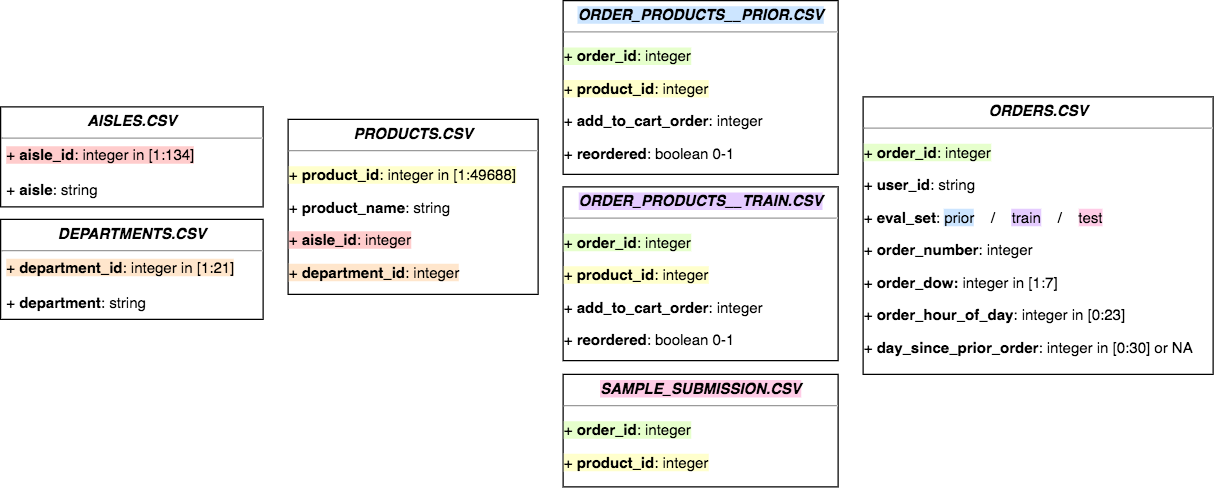

In [10]:
# 인스타카트 대회의 논리적 데이터 연결구조
# 이미지 출처 : https://kaggle2.blob.core.windows.net/forum-message-attachments/183176/6539/instacartFiles.png
from IPython.display import Image
Image(filename='/Users/jeongwoojin/Desktop/instacartFiles.png', width=700, height=500) 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 체크 결과 제 생각

1. PassengerId 는 나중에 드랍해야 겠다는 생각을 했습니다.
2. Name 변수는 PassengerId 같으니 드랍해야 겠다는 생각을 했습니다.
3. Sex 변수가 문자로 표현돼 있네, 나중에 0과 1로 더미코딩 해야겠다는 생각을 했습니다.
4. Age변수가 소수형, 혹시 29.7살과 같이 잘못된 값이 있지 않을까? 하는 생각을 했습니다 

참고 : Name변수의 경우 Mr,Miss를 통해 사회적 지위를 예측해 볼 수 있기 때문에 나중에 EDA과정에서 살펴볼 것입니다. 하지만 이는 결론적 접근법이지 데이터를 처음 살펴본 상태로 파악하는 것은 무리가 있다고 생각합니다. 따라서 데이터를 처음본 경우 Name변수에서 느낄 수 있었던 생각을 표현했습니다.

## (3) Check Structures
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

**<목적>**

1. 눈으로 확인한 데이터를 자료 구조적 측면에서 살펴본다.
    - 간혹 숫자로 입력된듯 보이지만 실제는 문자(object)형으로 입력된 경우도 존재합니다. 이러한 이상을 잡아낼 수 있습니다.
    
2. NaN 과 Null을 잡아낸다. 
        Age 714 non-null float64
    - 전체 891개의 행인데 위 Age 변수는 714개의 행밖에 표현되지 않았습니다. 이는 714개만 ```non-null``` 이고 나머지는 결측값 혹은 null값이라는 의미입니다. 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 체크 결과 제 생각

1. 타입이 변경돼 로드된 변수는 없다는 것을 알게됐습니다.
2. Age, Cabin, Embarked 에서 NaN 혹은 Null이 있다는 사실을 알게됐습니다.

## (4) Check Summary
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.


**<목적>**

1. 분포를 대략적으로 살펴봅니다. 
    - 여기서 EDA와 다른 중요한 점은 대략적으로 빨리 훓고 넘어가는것입니다. 
    
2. Unique 값과 이상치 혹은 영향치를 찾아봅니다.
    - 예를 들어 Fare 변수는 평균이 32.204208 지만 최대값이 512.329200 이기 때문에 왜도의 절대값이 큰것을 알 수 있습니다. 만약 이 문제가 회귀분석이었다면 512.329200이라는 값이 영향치로 작용할 수 있습니다. 따라서 log값을 취하거나 삭제해야할것입니다.

In [7]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Culumovic, Mr. Jeso",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 체크 결과 제 생각

1. Survived의 평균이 0.383838 기 때문에 라벨값에서 사망이 더 많다는 사실을 알게됐습니다.
2. Name의 경우 891개의 고유값이 있습니다. 따라서 drop에 대해 더 강한 확신이 생겼습니다.(혹은 파생변수의 필요성)
3. Ticket의 경우 681개의 고유값을 갖습니다. 따라서 Name처럼 드랍하거나 파생변수를 만들어야 할것입니다.
    - 좀 더 깊게 들어가면 티켓 넘버 347082의 값이 가장 최빈값이며, 7개의 빈도를 갖습니다. 따라서 데이터를 잘 처리하면 티켓에도 규칙이 있을것이라는 생각도 해볼 수 있습니다.
4. Cabin 값은 204개의 정상값 중 147의 고유값을 갖습니다. 따라서 Name처럼 드랍하거나 파생변수를 만들어야 할것입니다.
5. head를 보는 과정에서 age가 소수점인 사실에 대해 의문을 갖었습니다. summary를 살펴봐 실제 20.125 같은 경우가 있다는 사실을 확인했습니다.

tip : 데이터설명서가 자세하게 작성되지 않았을 경우 숫자변수들이 범주형인지 아닌지 구분하기 애매할 때가 있습니다. 이 경우 최소, 25%, 50%, 75% 최대 값을 확인했을 때 모두 Pclass 변수처럼 정수형이고 mun값에 비해 max값이 크지 않을때 범주형으로 생각해볼 수 있습니다.

## (5) Check NaN
동일한 과정이기 때문에 test 데이터에 대한 작업은 생략하였습니다.

**<목적>**

1. 결측값을 더 자세하게 살펴봅니다.

structure를 살펴보는 과정에서 구할 수 있지만, 칼럼이 많아질 경우 혹은 정확한 수치를 알고 싶은경우 structure만 보고 판단하기에는 불편함이 있습니다. 따라서 결측값을 더 자세하게 살펴봅니다.

In [39]:
## NaN의 수
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
## NaN의 비율 : 일반적으로 80%가 내외의 경우 drop을 고려합니다.
train.isnull().sum() / train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### 체크 결과 제 생각

1. Embarked의 경우 2개의 결측값이 있습니다. 따라서 최빈값(범주형변수 : 데이터설명서 참조)으로 대체해도 결과에 큰 영향이 없을것입니다.
2. Age의 경우 177 개의 결측치가 있습니다. 따라서 평균, 중앙값, 예측 3가지 옵션중 더 결과가 좋은 값을 대체해야 할것입니다.
3. Cabin은 77%가 결측치 입니다. 따라서 드랍을 고려해봐야 합니다.